## Introduction


[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLOv8 (You Only Look Once, Version 8) is the latest iteration of the YOLO family, a state-of-the-art object detection, segmentation, and classification model. It is designed for high speed and accuracy, making it suitable for real-time applications. YOLOv8 introduces several improvements, including an upgraded architecture, dynamic anchor assignments, and compatibility with PyTorch for ease of use. Its modular design allows for flexibility in training custom datasets and seamless integration into machine learning pipelines, maintaining its reputation as a robust solution for computer vision tasks.


## Setup

### Configure API keys

To fine-tune YOLO8, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator` and set it to `GPU`.

In [1]:
!nvidia-smi

Tue Dec 17 07:17:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Install YOLO8 via Ultralytics

In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [5]:
!yolo task=segment mode=predict model=yolov8m-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 52.4M/52.4M [00:00<00:00, 71.2MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,268,704 parameters, 0 gradients, 110.2 GFLOPs

100% 104k/104k [00:00<00:00, 72.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 3 backpacks, 116.4ms
Speed: 11.8ms preprocess, 116.4ms inference, 1594.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

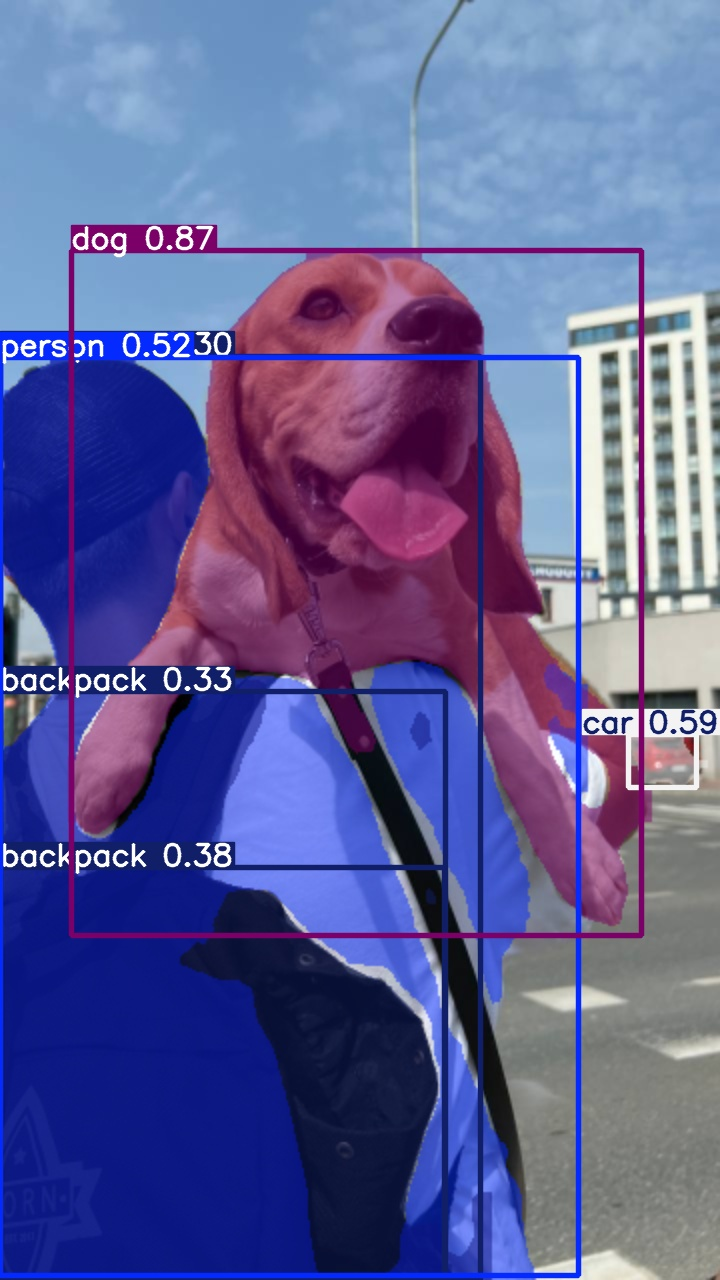

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/predict/dog.jpg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [7]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolov8m-seg.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 1 person, 1 car, 1 dog, 3 backpacks, 130.5ms
Speed: 6.9ms preprocess, 130.5ms inference, 661.4ms postprocess per image at shape (1, 3, 640, 384)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [8]:
result.boxes.xyxy

tensor([[7.1613e+01, 2.5060e+02, 6.4173e+02, 9.3539e+02],
        [6.2866e+02, 7.3475e+02, 6.9679e+02, 7.8779e+02],
        [9.7986e-01, 3.5747e+02, 5.7837e+02, 1.2756e+03],
        [0.0000e+00, 8.6742e+02, 4.4445e+02, 1.2792e+03],
        [0.0000e+00, 6.9136e+02, 4.4525e+02, 1.2800e+03],
        [0.0000e+00, 3.5686e+02, 4.8025e+02, 1.2791e+03]], device='cuda:0')

In [9]:
result.boxes.conf

tensor([0.8732, 0.5885, 0.5165, 0.3797, 0.3301, 0.3004], device='cuda:0')

In [10]:
result.boxes.cls

tensor([16.,  2.,  0., 24., 24., 24.], device='cuda:0')

In [11]:
result.masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

**NOTE:** YOLO8 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [12]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

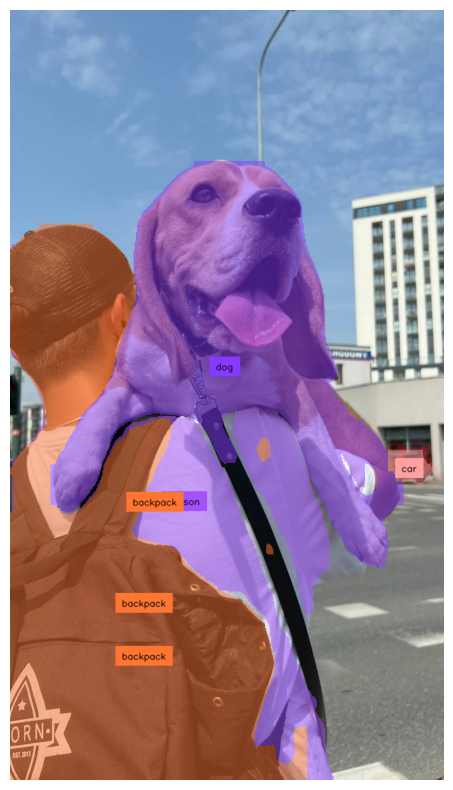

In [13]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO8 on River Plastic Waste Dataset

**NOTE:** When training YOLOv8, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov8` export format.

In [14]:
from google.colab import userdata

In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("project-zero").project("aerial_river_plastic_wastes")
version = project.version(10)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aerial_River_Plastic_Wastes-10 in yolov8:: 100%|██████████| 4938/4938 [00:01<00:00, 2625.76it/s]


## Custom Training

Check this link to tweak hyperparameters: https://docs.ultralytics.com/modes/train/#train-settings

In [16]:
%cd {HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=15 plots=True batch=32 device=0 save=True imgsz=640

/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8
100% 52.4M/52.4M [00:00<00:00, 122MB/s] 
New https://pypi.org/project/ultralytics/8.3.50 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/Aerial_River_Plastic_Wastes-10/data.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buf

**NOTE:** The results of the completed training are saved in `{HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/runs/segment/train/`. Let's examine them.

In [20]:
!ls {HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch360.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch361.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch362.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       val_batch1_labels.jpg
events.out.tfevents.1734419971.cb842993963e.1174.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg  weights


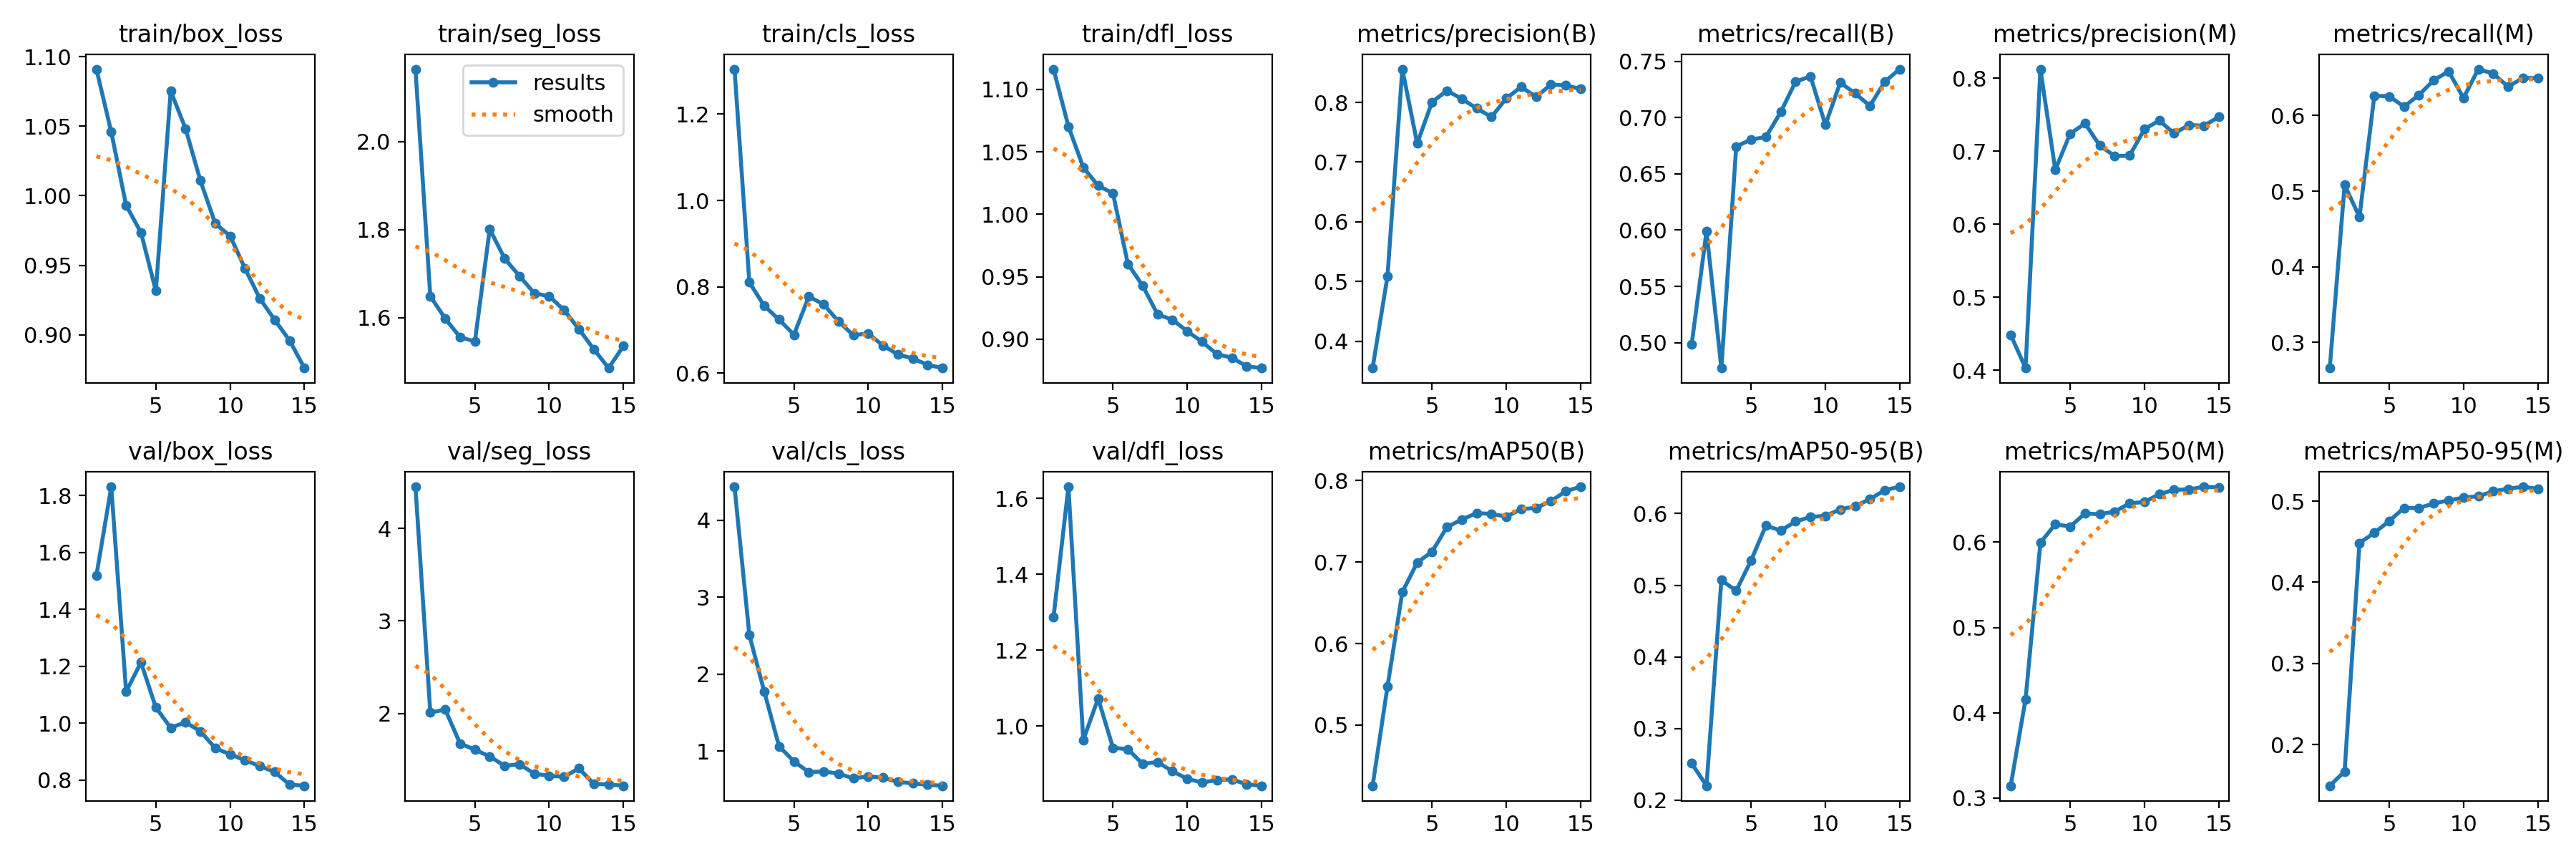

In [21]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/results.png')

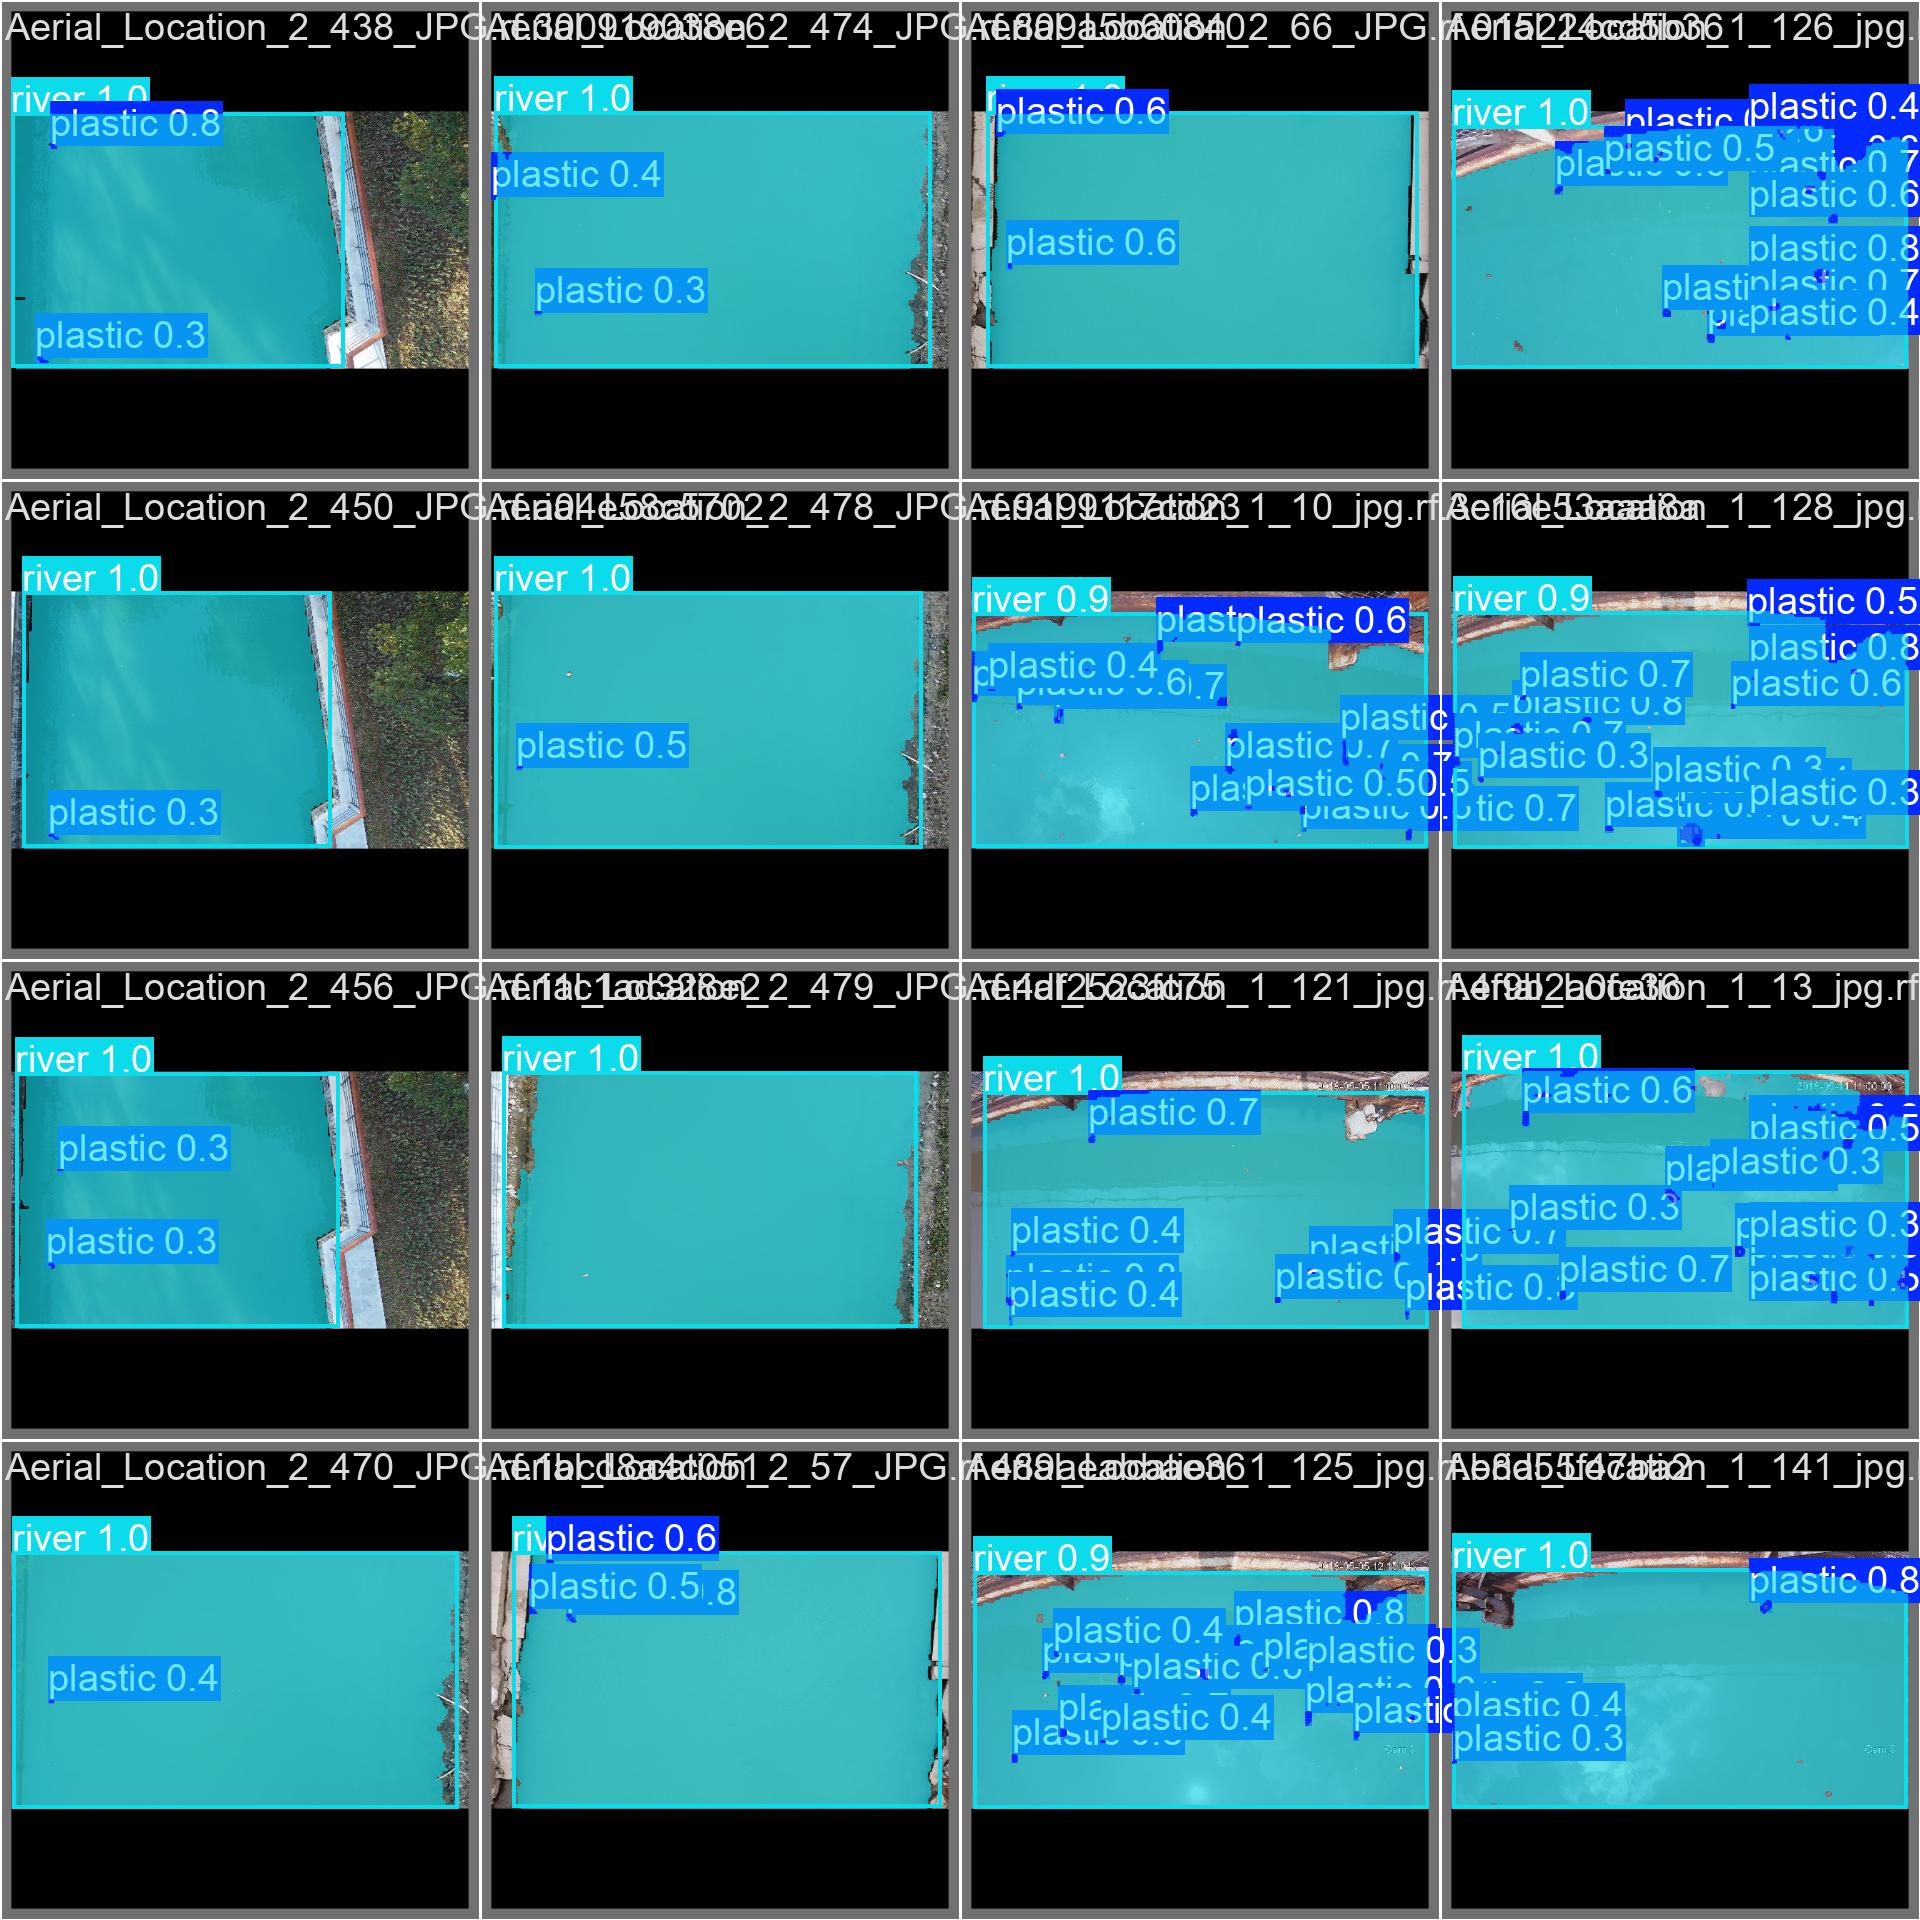

In [22]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [23]:
%cd {HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/
!yolo task=segment mode=val model={HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/Aerial_River_Plastic_Wastes-10/valid/labels.cache... 94 images, 0 backgrounds, 0 corrupt: 100% 94/94 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:07<00:00,  1.24s/it]
                   all         94       1049      0.822      0.744      0.793      0.641      0.735      0.641      0.653      0.507
               plastic         93        942      0.691      0.581      0.653      0.378      0.511      0.376      0.372      0.125
                 river         92        107      0.954      0.907      0.934      0.904      0.959      0.907      0.934       0.89
Speed: 6.4ms preprocess, 26.0ms inference, 0.0ms loss,

## Inference with custom model

In [24]:
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs

image 1/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_108_jpg.rf.0cd592574b46ddf6aa2e71c6b5240fc1.jpg: 640x640 12 plastics, 1 river, 45.7ms
image 2/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_120_jpg.rf.e14b0782d7d1057f187c3885b9101ed2.jpg: 640x640 8 plastics, 1 river, 45.7ms
image 3/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_122_jpg.rf.a3450937e6d66ebea12a3d53b9c70b1b.jpg: 640x640 8 plastics, 1 river, 45.6ms
image 4/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_153_jpg.rf.d6f4c6202d61c3e837f0b2c990e62e08.jpg: 640x640 17 plastics, 1 river, 38.2ms
image 5/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_17_jpg.rf.5a17f2f214b4f1e10684166b4

**Let's take a look at few results.**

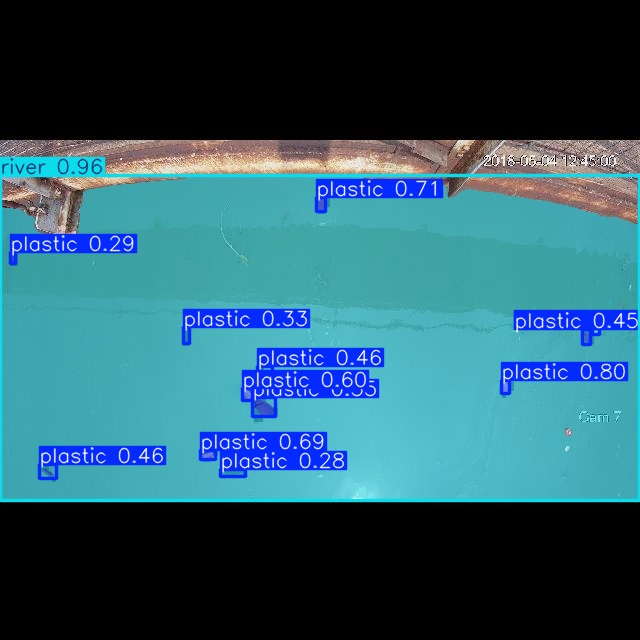

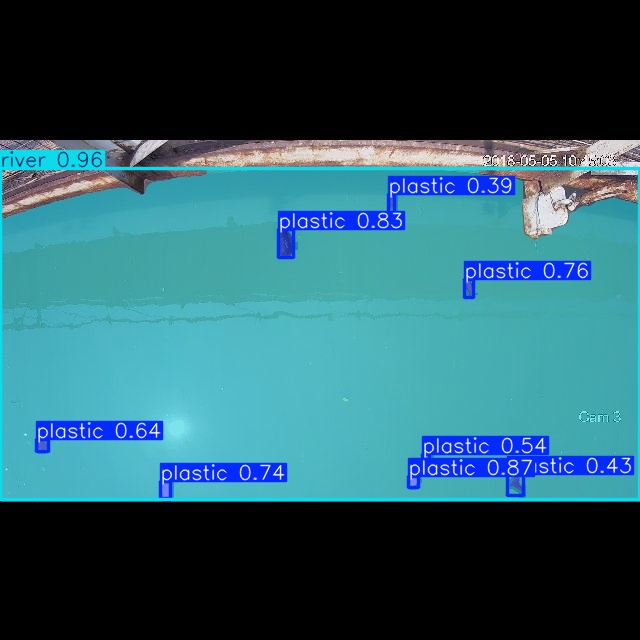

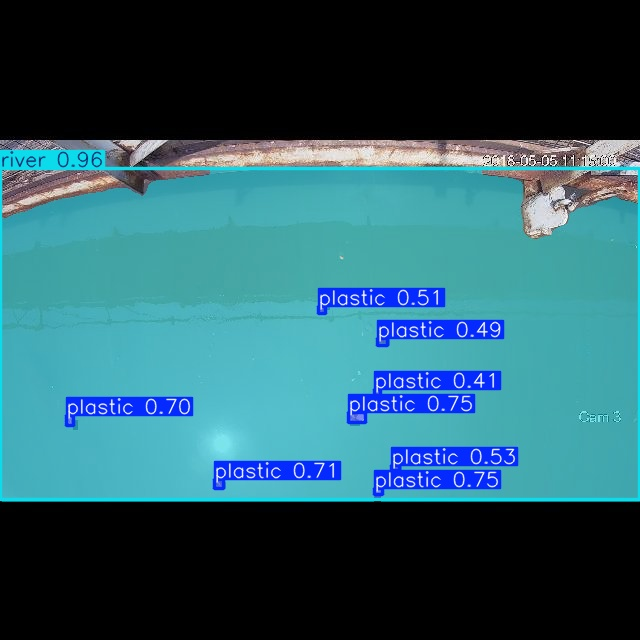

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

### Export Model in ONNX

In [26]:
%cd {HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/
!yolo export model={HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/weights/best.pt format=onnx dynamic=True imgsz=640 optimize=True device=None

/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8m-seg summary (fused): 245 layers, 27,223,542 parameters, 0 gradients, 110.0 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 38, 8400), (1, 32, 160, 160)) (52.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 296.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 297.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 295.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 232.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 311.8 MB/s eta 0:00:00

requirements: AutoUpdate succe

### Loding

In [53]:
from ultralytics import YOLO

In [45]:
# Load the ONNX model
model_path = "/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/weights/best.onnx"

In [52]:
# Perform inference
image_path = "/content/Aerial_Location_2_13.JPG"

In [54]:
# Load the exported ONNX model
onnx_model = YOLO(model_path)

# Run inference
results = onnx_model(image_path)

Loading /content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo8/runs/segment/train/weights/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 212.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 19.8s, installed 1 package: ['onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

WARNING ⚠️ Failed to start ONNX Runtime session with CUDA. Falling back to CPU...
Preferring ONNX Runtime AzureExecutionProvider

image 1/1 /content/Aerial_Location_2_13.JPG: 384x640 2 plastics, 1 river, 652.3ms
Speed: 3.1ms preprocess, 652.3ms inference, 27.8ms postprocess per image at shape (1, 3, 384, 640)


In [57]:
import supervision as sv

detections = sv.Detections.from_ultralytics(results[0])

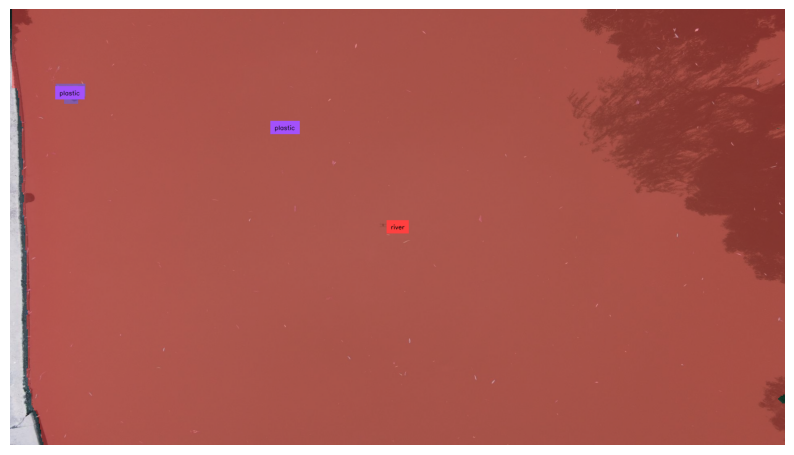

In [58]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))